In [2]:
%load_ext autoreload

%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [4]:
import sys
!{sys.executable} -m pip install tslearn --user

You are using pip version 18.1, however version 20.3b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
from tslearn.metrics import soft_dtw, dtw

In [6]:
path = 'sm_data.nc'
ds = xr.open_dataset(path)

In [7]:
x1 = []
x2 = []

i1 = 20
i2 = 21

for elem in ds['moisture']:
    x1.append(elem[i1][0])
    x2.append(elem[i2][0])

KeyboardInterrupt: 

In [ ]:
n1 = np.array(x1)

In [ ]:
n2 = np.array(x2)

In [ ]:
nulls = np.empty(10)
nulls[:] = np.nan

length = abs(len(n1) - len(n2))
len(n1)
len(n2)

In [ ]:
s1 = pd.Series(n1)
s2 = pd.Series(n2)
covariance = s1.cov(s2)

In [ ]:
covariance

In [ ]:
cov2 = s2.cov(s1)
cov2

In [8]:
data = ds.transpose()

In [9]:
data

<xarray.Dataset>
Dimensions:        (box: 39, level: 6, time: 302043)
Coordinates:
  * time           (time) datetime64[ns] 2010-09-30T02:00:00 ... 2019-05-12T0...
  * box            (box) int64 2 3 4 5 6 7 8 9 10 ... 32 33 34 35 36 37 38 39 40
  * level          (level) int64 1 2 3 4 5 6
Data variables:
    moisture       (level, box, time) float64 ...
    temp           (level, box, time) float64 ...
    moisture_flag  (level, box, time) object ...
    temp_flag      (level, box, time) object ...
    battv          (box, time) float64 ...

/p/software/jusuf/stages/Devel-2019a/software/SciPy-Stack/2019a.1-gcccoremkl-8.3.0-2019.3.199-Python-3.6.8/lib/python3.6/site-packages/pandas-0.25.3-py3.6-linux-x86_64.egg/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


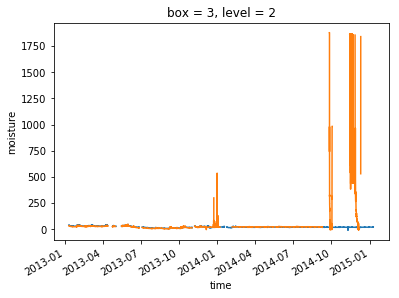

In [10]:
for i in range(6):
    for j in range(39):
        #data['moisture'][i][j].plot()
        pass
data['moisture'][0][18][80000:150000].plot()
data['moisture'][1][1][80000:150000].plot()

41.77828413985382

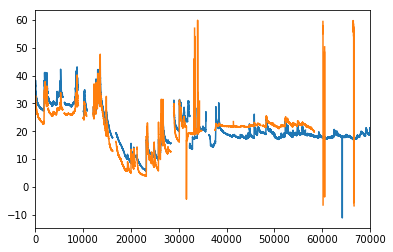

In [11]:
s1 = pd.Series(data['moisture'][0][18][80000:150000])
s2 = pd.Series(data['moisture'][1][1][80000:150000])
s1[s1 > 60] = np.nan
s2[s2 > 60] = np.nan
s1.plot()
s2.plot()
covariance = s1.cov(s2)
covariance

In [12]:
s = []
for i in range(39):
    for j in range(6):
        s1 = pd.Series(data['moisture'][j][i][80000:150000])
        s1[s1 > 60] = np.nan
        s.append(s1)



In [13]:
m = []
for i in range(len(s)):
    row = []
    for j in range(len(s)):
        if i == j:
            row.append(0)
        # no 43 seems to be an outlier
        #elif i == 43 or j == 43:
        #    row.append(0)
        else:
            row.append(s[i].cov(s[j]))
    m.append(row)

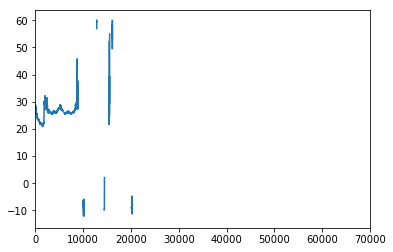

In [14]:
#s[42].plot()
s[43].plot()
#s[44].plot()
#s[45].plot()
#s[46].plot()
#s[47].plot()

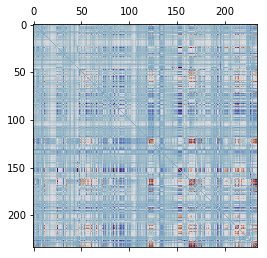

In [15]:
plt.matshow(m, cmap='twilight_shifted')

In [16]:
plt.savefig('cov_matrix.png', dpi = 400)

<Figure size 432x288 with 0 Axes>

In [17]:
min(min(m))

-231.9550506048129

In [18]:
max(max(m))

271.7625706138389

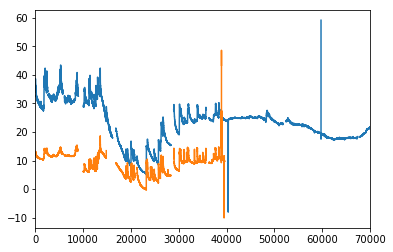

In [19]:
s[208].plot()
s[39].plot()

In [20]:
m2 = np.cov(s)

In [28]:
import sys
!{sys.executable} -m pip install scikit-learn --user

You are using pip version 18.1, however version 20.3b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [43]:
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer, SimpleImputer

In [36]:
nps = list(map(lambda x: np.array(x), s))

In [37]:
nan = np.nan
imputer = KNNImputer(n_neighbors=8, weights="uniform")
X = imputer.fit_transform(nps)

In [38]:
kmeans = KMeans(n_clusters=8).fit(X)

In [39]:
kmeans.labels_

array([7, 1, 0, 1, 1, 1, 1, 1, 6, 6, 1, 1, 0, 3, 5, 1, 5, 5, 1, 3, 3, 1,
       3, 3, 5, 4, 3, 3, 3, 5, 3, 7, 3, 3, 0, 3, 1, 3, 1, 6, 5, 3, 1, 1,
       3, 3, 6, 3, 2, 0, 5, 0, 0, 7, 0, 4, 2, 2, 6, 2, 1, 0, 1, 3, 1, 3,
       2, 3, 5, 3, 1, 1, 0, 7, 1, 7, 5, 5, 1, 1, 3, 1, 6, 1, 7, 4, 1, 7,
       1, 3, 7, 7, 7, 7, 7, 7, 5, 5, 7, 5, 1, 1, 1, 1, 3, 5, 5, 3, 1, 5,
       5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 3,
       3, 3, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 5, 3, 6, 3, 2, 6, 4, 4, 4,
       4, 4, 3, 3, 7, 1, 1, 3, 4, 0, 0, 0, 0, 0, 0, 5, 0, 1, 5, 5, 7, 5,
       0, 5, 5, 7, 1, 2, 5, 3, 5, 3, 5, 5, 1, 2, 1, 6, 7, 5, 0, 1, 5, 5,
       1, 6, 3, 3, 3, 2, 5, 3, 7, 5, 1, 3, 3, 0, 2, 2, 0, 6, 3, 0, 2, 2,
       2, 2, 1, 2, 6, 6, 5, 4, 0, 1, 0, 0, 0, 0], dtype=int32)

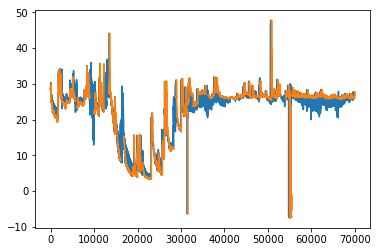

In [42]:
plt.plot(X[0])
plt.plot(nps[0])

In [44]:
imputer = SimpleImputer(strategy="most_frequent")
X2 = imputer.fit_transform(nps)

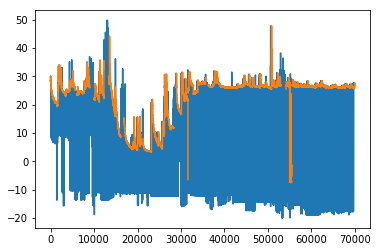

In [45]:
plt.plot(X2[0])
plt.plot(nps[0])

In [46]:
import sys
!{sys.executable} -m pip install kpod --user

You are using pip version 18.1, however version 20.3b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [47]:
from kPOD import k_pod
""" Cite: Chi JT, Chi EC, Baraniuk RG (2016). “$k$-POD: A Method for $k$-Means Clustering of Missing Data.” The American Statistician, 70, 91–99. doi: 10.1080/00031305.2015.1086685, http://www.tandfonline.com/doi/abs/10.1080/00031305.2015.1086685."""

In [48]:
k = 8

In [49]:
clustering_results = k_pod(nps, k)

In [50]:
clustering_results

(array([6., 6., 0., 6., 6., 6., 6., 6., 1., 6., 6., 6., 7., 4., 4., 4., 4.,
        4., 6., 4., 4., 6., 4., 4., 4., 3., 6., 4., 4., 4., 4., 6., 4., 4.,
        0., 4., 6., 4., 6., 6., 4., 4., 6., 6., 4., 4., 6., 4., 3., 0., 4.,
        0., 0., 6., 0., 5., 0., 3., 0., 3., 6., 7., 6., 4., 6., 4., 3., 4.,
        4., 4., 4., 6., 7., 6., 6., 6., 4., 4., 6., 6., 7., 6., 6., 6., 2.,
        5., 6., 6., 6., 4., 6., 6., 6., 6., 6., 6., 4., 4., 6., 4., 6., 6.,
        6., 6., 4., 4., 4., 4., 6., 4., 4., 4., 6., 4., 4., 4., 4., 6., 6.,
        4., 7., 7., 7., 7., 0., 7., 7., 6., 6., 6., 4., 4., 4., 6., 6., 6.,
        6., 6., 6., 6., 4., 6., 6., 6., 6., 4., 4., 3., 4., 3., 1., 5., 5.,
        5., 5., 5., 4., 6., 6., 6., 6., 4., 1., 0., 0., 0., 0., 0., 0., 4.,
        7., 6., 4., 4., 6., 4., 7., 4., 4., 6., 4., 3., 4., 4., 4., 4., 6.,
        6., 6., 5., 6., 1., 2., 2., 4., 6., 6., 4., 6., 6., 3., 4., 4., 3.,
        4., 4., 6., 4., 4., 4., 4., 3., 3., 4., 3., 1., 4., 3., 3., 3., 3.,
        3., 

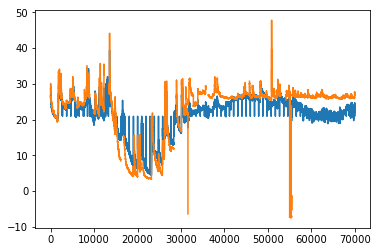

In [59]:
plt.plot(clustering_results[1][6])
plt.plot(nps[0])

In [63]:
data['moisture_flag'][0][0][80000:150000]

<xarray.DataArray 'moisture_flag' (time: 70000)>
array(['OK', 'OK', 'OK', ..., 'OK', 'OK', 'OK'], dtype=object)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-10T10:00:00 ... 2015-01-09T13:45:00
    box      int64 2
    level    int64 1

In [75]:
def generate_test_train(data, boxes=39, sensors=6, t1=80000, t2=150000, v1=150000, v2=160000):
    train_features = []
    test_features = []
    train_labels = []
    test_labels = []
    for i in range(boxes):
        for j in range(sensors):
            train_feature = pd.Series(data['moisture'][j][i][t1:t2])
            train_label = pd.Series(data['moisture_flag'][j][i][t1:t2])
            train_frame = { 'Feature': train_feature, 'Label': train_label }
            train_df = pd.DataFrame(train_frame)
            train_df.loc[train_df['Label'] != 'OK', 'Feature'] = np.nan
            train_features.append(np.array(train_df['Feature']))
            train_labels.append(np.array(train_df['Label']))
            test_feature = pd.Series(data['moisture'][j][i][v1:v2])
            test_label = pd.Series(data['moisture_flag'][j][i][v1:v2])
            test_frame = { 'Feature': test_feature, 'Label': test_label }
            test_df = pd.DataFrame(test_frame)
            test_df.loc[test_df['Label'].isin(['Auto:Range','Auto:Spike', 'Auto:BattV']), 'Feature'] = np.nan
            test_features.append(np.array(test_df['Feature']))
            test_labels.append(np.array(test_df['Label']))
    return train_features, train_labels, test_features, test_labels

In [66]:
i = 0
j = 0
train_feature = pd.Series(data['moisture'][j][i][80000:150000])
train_label = pd.Series(data['moisture_flag'][j][i][80000:150000])
train_frame = { 'Feature': train_feature, 'Label': train_label }
train_df = pd.DataFrame(train_frame)
train_df.head()

,Feature,Label
0,28.6312,OK
1,28.6920,OK
2,28.5705,OK
3,28.4623,OK
4,28.5201,OK


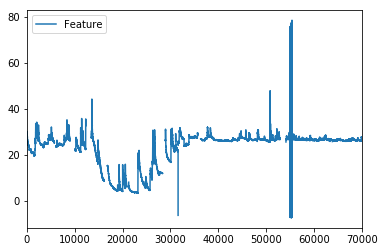

In [67]:
train_df.plot()

In [68]:
train_df.loc[train_df['Label'] != 'OK', 'Feature'] = np.nan

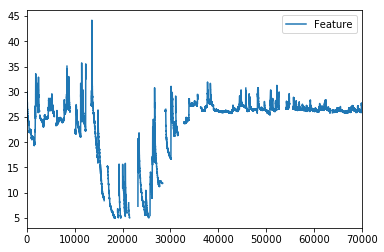

In [69]:
train_df.plot()

In [74]:
np.array(train_df["Feature"])

array([28.6312, 28.692 , 28.5705, ..., 26.9639, 26.9639, 26.8566])

In [76]:
train_fs, train_ls, test_fs, test_ls = generate_test_train(data)

542.8477986342976

In [128]:
""" Data input as feature set e.g. """
def cov_matrix(data1):
    m = []
    for i in range(len(data1)):
        row = []
        for j in range(len(data1)):
            if i == j:
                row.append(0)
            else:
                row.append(pd.Series(data1[i]).cov(pd.Series(data1[j])))
        m.append(row)
    maximum = max([abs(min(np.concatenate(m))), abs(max(np.concatenate(m)))])
    m = m / (maximum if maximum != 0 else 1)
    return m

5

In [129]:
m = cov_matrix(train_fs)

In [130]:
m

array([[0.        , 0.09661473, 0.12521644, ..., 0.09968339, 0.16039037,
        0.25061461],
       [0.09661473, 0.        , 0.06051204, ..., 0.0944061 , 0.17187654,
        0.23200783],
       [0.12521644, 0.06051204, 0.        , ..., 0.09135235, 0.13173684,
        0.2537893 ],
       ...,
       [0.09968339, 0.0944061 , 0.09135235, ..., 0.        , 0.11212836,
        0.16016636],
       [0.16039037, 0.17187654, 0.13173684, ..., 0.11212836, 0.        ,
        0.28975008],
       [0.25061461, 0.23200783, 0.2537893 , ..., 0.16016636, 0.28975008,
        0.        ]])

In [146]:
cluster_lookup = {}
for i in range(len(clustering_results[0])):
    index = int(clustering_results[0][i])
    if index not in cluster_lookup.keys():
        cluster_lookup[index] = []
    cluster_lookup[index].append(i)

In [153]:
cl = cluster_lookup
cli = list(map(lambda x: int(x), clustering_results[0]))

In [296]:
start_index = 0
end_index = 10000

c = 6

test_fs[0][start_index:end_index]

clusters = []
for i in range(8):
    temp_fs = []
    temp_ls = []
    for c_index in cluster_lookup[i]:
        temp_fs.append(test_fs[c_index])
        temp_ls.append(test_ls[c_index])

    clusters.append((temp_fs, temp_ls))

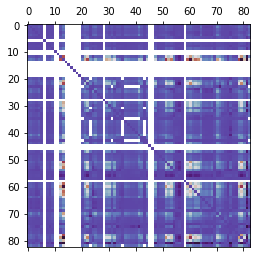

In [159]:
plt.matshow(temp_m, cmap='twilight_shifted')

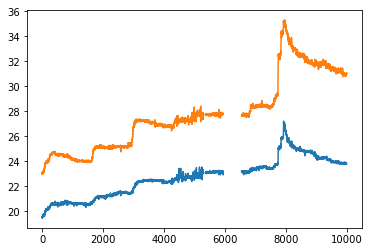

In [184]:
plt.plot(test_fs[cluster_lookup[c][61]])
plt.plot(test_fs[cluster_lookup[c][60]])

In [181]:
temp_m_squared = cov_matrix(temp_m)

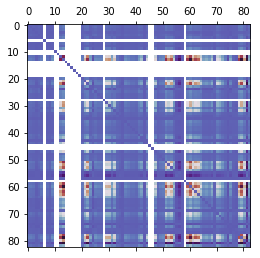

In [183]:
plt.matshow(temp_m_squared, cmap='twilight_shifted')

In [185]:
clustering2 = k_pod(temp_fs, 5)

(array([19.,  0.,  3.,  0.,  0., 55.,  0.,  3.,  0.,  3.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

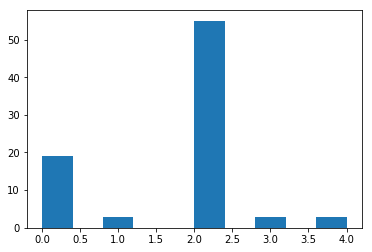

In [186]:
plt.hist(clustering2[0])

In [187]:
clustering2[0]

array([2., 2., 1., 2., 2., 3., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 0., 2., 0., 2., 2., 0., 2., 0., 2., 2., 3., 2., 2., 2.,
       0., 2., 0., 2., 0., 0., 0., 2., 0., 2., 2., 2., 2., 2., 0., 2., 2.,
       0., 2., 2., 2., 4., 4., 4., 2., 0., 2., 2., 2., 2., 2., 2., 0., 2.,
       2., 1., 0., 0., 0., 0., 2., 2., 2., 2., 2., 1., 0., 2., 2.])

In [193]:
np.count_nonzero(~np.isnan(test_fs[16]))

278

In [195]:
test_fs_filtered = list(filter(lambda x: np.count_nonzero(~np.isnan(x)) > 1000, test_fs))

In [216]:
clustering3 = k_pod(temp_fs, 1)

In [249]:
cluster6 = temp_fs
test_m = np.array(cluster6)

In [263]:
cluster6_transposed = test_m.transpose()

In [284]:
means = []
for i in cluster6_transposed:
    means.append(np.nanmean(i))
    
variances = []
for i in cluster6_transposed:
    variances.append(np.nanvar(i))

In [256]:
m_avg = np.nanmean(cluster6_transposed, axis=1)

/p/software/jusuf/stages/Devel-2019a/software/Jupyter/2019a.2.3-gcccoremkl-8.3.0-2019.3.199-Python-3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


In [289]:
testing = temp_fs
testing

for elem in testing:
    #find out which cluster
    pass

In [257]:
t1avg = list(map(lambda x: abs(x[0]-x[1]), list(zip(cluster6[0], m_avg))))

In [258]:
t40avg = list(map(lambda x: abs(x[0]-x[1]), list(zip(cluster6[40], m_avg))))

In [259]:
max(t1avg)

4.011958823529412

In [260]:
for i in range(50):
    print(max(list(map(lambda x: abs(x[0]-x[1]), list(zip(cluster6[i], m_avg))))))

4.011958823529412
4.866504444444438
10.361048837209307
9.353748837209306
3.2634423076923014
11.865278431372548
nan
15.809598000000006
7.126186000000008
4.844528571428576
nan
nan
5.108653846153839
30.578914035087717
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
28.81524800000001
17.042935294117648
6.027750000000005
8.141742553191492
nan
3.4035272727272705
9.366670454545453
nan
4.967193333333334
9.530150000000003
10.767333333333337
3.031753191489365
nan
nan
nan
nan
nan
nan
8.750200000000003
26.177064814814816
7.8959624999999996
nan
nan
10.610486666666668
7.789349999999995
7.04751111111111


In [248]:
cluster6 = temp_fs
cluster2

83

(array([55.,  6.,  5., 11.,  2.,  4.]),
 array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
        4.16666667, 5.        ]),
 <a list of 6 Patch objects>)

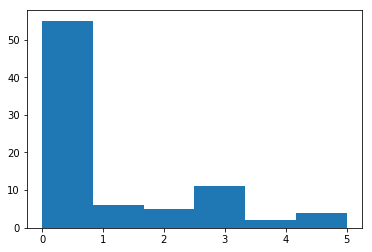

In [214]:
plt.hist(clustering3[0], bins=6)

In [215]:
clustering3[0]

array([0., 0., 1., 1., 0., 4., 0., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 3., 0., 3., 0., 0., 2., 0., 2., 0., 0., 1., 0., 0., 0.,
       2., 0., 3., 0., 3., 3., 3., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0.,
       3., 1., 0., 0., 5., 5., 5., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 3., 3., 3., 5., 0., 0., 0., 0., 0., 1., 2., 0., 0.])

(array([19.,  6.,  4.,  0., 19., 80.,  0.,  9., 83., 14.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

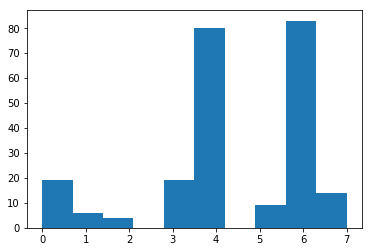

In [209]:
plt.hist(clustering_results[0])

In [303]:
for i in range(8):
    features, labels = clusters[i]
    f = np.array(features)
    f_t = f.transpose()
    means = []
    for i in f_t:
        means.append(np.nanmean(i))

    variances = []
    for i in f_t:
        variances.append(np.nanstd(i))
    
    acc = []
    for f1, l1 in list(zip(features, labels)):
        pred = list(map(lambda x: "OK" if abs(x[0] - x[1]) < x[2] else "Manual", list(zip(f1, means, variances))))
        tf = list(map(lambda x: x[0] == x[1], list(zip(pred, l1))))
        acc.append(tf.count(True) / len(tf))
    print(np.nanmean(acc))

/p/software/jusuf/stages/Devel-2019a/software/Jupyter/2019a.2.3-gcccoremkl-8.3.0-2019.3.199-Python-3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


0.09428947368421053
0.14053333333333332
0.525875
0.3667263157894737
0.41636749999999995
0.24032222222222221
0.4182650602409639
0.1777142857142857
